In [1]:
### Step 1: Data Loading & Preprocessing
import pandas as pd
import numpy as np
import os
import warnings
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")  # Suppress warnings

# Step 1.1: Define Dataset Path
dataset_path = "C:/Users/reddy/NASA_Battery_Dataset/extracted_data/cleaned_dataset/data/"

# Step 1.2: Load CSV Files
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
print("Available CSV files:", csv_files)

# Step 1.3: Load and Inspect a Sample File
if csv_files:
    sample_file = os.path.join(dataset_path, csv_files[0])
    df = pd.read_csv(sample_file)
    print("\nSample Data from:", csv_files[0])
    print(df.head())

# Step 1.4: Normalize Data Using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])
df_scaled = pd.DataFrame(scaled_data, columns=df.columns[1:])

Available CSV files: ['00001.csv', '00002.csv', '00003.csv', '00004.csv', '00005.csv', '00006.csv', '00007.csv', '00008.csv', '00009.csv', '00010.csv', '00011.csv', '00012.csv', '00013.csv', '00014.csv', '00015.csv', '00016.csv', '00017.csv', '00018.csv', '00019.csv', '00020.csv', '00021.csv', '00022.csv', '00023.csv', '00024.csv', '00025.csv', '00026.csv', '00027.csv', '00028.csv', '00029.csv', '00030.csv', '00031.csv', '00032.csv', '00033.csv', '00034.csv', '00035.csv', '00036.csv', '00037.csv', '00038.csv', '00039.csv', '00040.csv', '00041.csv', '00042.csv', '00043.csv', '00044.csv', '00045.csv', '00046.csv', '00047.csv', '00048.csv', '00049.csv', '00050.csv', '00051.csv', '00052.csv', '00053.csv', '00054.csv', '00055.csv', '00056.csv', '00057.csv', '00058.csv', '00059.csv', '00060.csv', '00061.csv', '00062.csv', '00063.csv', '00064.csv', '00065.csv', '00066.csv', '00067.csv', '00068.csv', '00069.csv', '00070.csv', '00071.csv', '00072.csv', '00073.csv', '00074.csv', '00075.csv', '00

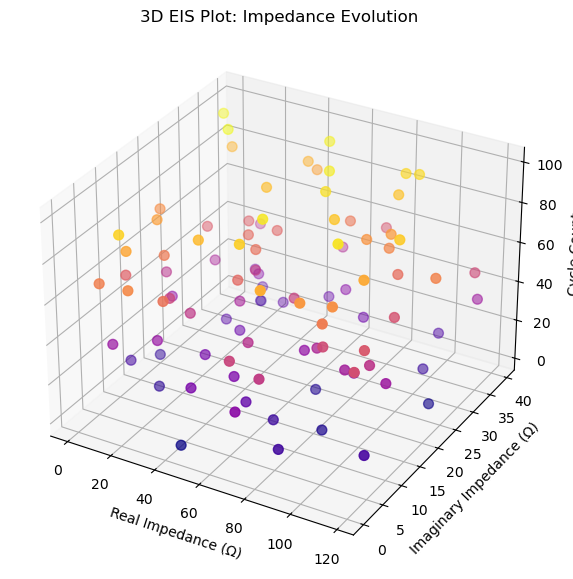

In [2]:
### Step 2: Electrochemical Impedance Spectroscopy (EIS) Analysis (3D Plot)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 2.1: Generate Synthetic EIS Data
np.random.seed(42)
cycle_count = np.arange(1, 101)
real_impedance = np.random.uniform(0, 120, 100)
imag_impedance = np.random.uniform(0, 40, 100)

# Step 2.2: Create 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(real_impedance, imag_impedance, cycle_count, c=cycle_count, cmap='plasma', s=50)
ax.set_xlabel("Real Impedance (Ω)")
ax.set_ylabel("Imaginary Impedance (Ω)")
ax.set_zlabel("Cycle Count")
ax.set_title("3D EIS Plot: Impedance Evolution")
plt.show()


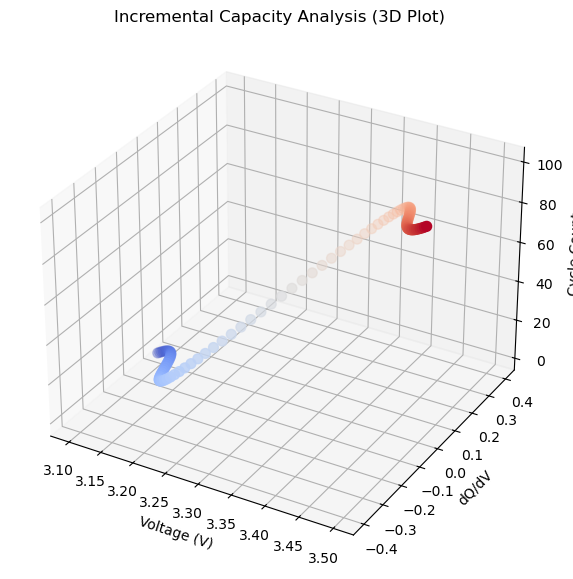

In [3]:
### Step 3: Incremental Capacity (dQ/dV) Analysis (3D Plot)
voltage_range = np.linspace(3.1, 3.5, 100)
dq_dv = np.sin(10 * (voltage_range - 3.3)) * np.exp(-(voltage_range - 3.3)**2 / 0.01)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(voltage_range, dq_dv, cycle_count, c=cycle_count, cmap='coolwarm', s=50)
ax.set_xlabel("Voltage (V)")
ax.set_ylabel("dQ/dV")
ax.set_zlabel("Cycle Count")
ax.set_title("Incremental Capacity Analysis (3D Plot)")
plt.show()


In [4]:
### Step 4: Battery Performance Forecasting (LSTM Model)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Generate Synthetic Time-Series Data
time_steps = 150
time_series = np.cumsum(np.random.randn(time_steps) * 0.3 + 0.2) + 50
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1))

# Prepare Data for LSTM
X_seq, y_seq = [], []
seq_length = 10
for i in range(len(time_series_scaled) - seq_length):
    X_seq.append(time_series_scaled[i:i + seq_length])
    y_seq.append(time_series_scaled[i + seq_length])
X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# Split Data
split = int(len(X_seq) * 0.8)
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]

# Build LSTM Model
model_lstm = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train_seq, y_train_seq, epochs=50, batch_size=8, validation_data=(X_test_seq, y_test_seq))

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.2913 - val_loss: 0.6390
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1510 - val_loss: 0.1244
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0277 - val_loss: 0.0387
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0238 - val_loss: 0.0355
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0164 - val_loss: 0.0106
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0099 - val_loss: 0.0049
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090 - val_loss: 0.0019
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0057 - val_loss: 3.1525e-04
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0072 - val_loss: 0.0016
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0076 - val_loss: 5.8714e-04
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0059 - val_loss: 0.0040
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step -

In [5]:
### Step 5: Battery Capacity Prediction (Machine Learning Model)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Train Gradient Boosting Model
model_gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
model_gbr.fit(X_train_seq.reshape(len(X_train_seq), -1), y_train_seq)

y_pred_gbr = model_gbr.predict(X_test_seq.reshape(len(X_test_seq), -1))
mse = mean_squared_error(y_test_seq, y_pred_gbr)
print(f"Gradient Boosting MSE: {mse:.4f}")


Gradient Boosting MSE: 0.0123


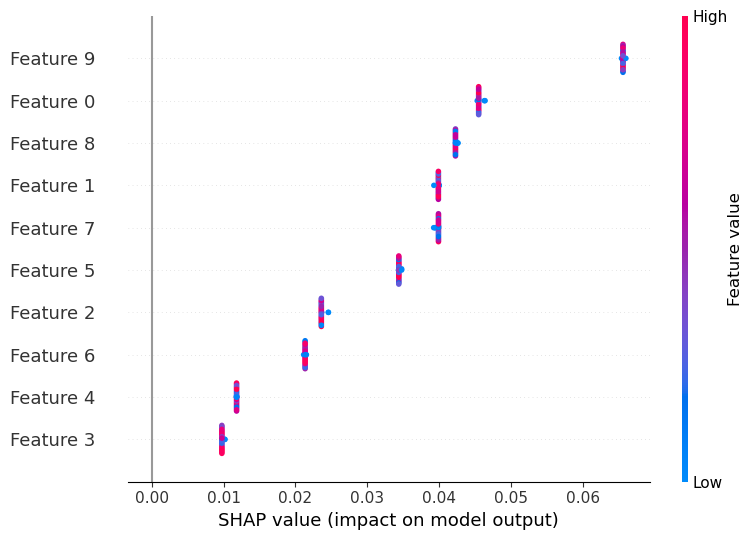

In [6]:
### Step 6: Model Evaluation & Explainability (SHAP Analysis)
import shap

explainer = shap.Explainer(model_gbr, X_train_seq.reshape(len(X_train_seq), -1))
shap_values = explainer(X_test_seq.reshape(len(X_test_seq), -1))
shap.summary_plot(shap_values, X_test_seq.reshape(len(X_test_seq), -1))


[I 2025-02-26 11:46:16,111] A new study created in memory with name: no-name-ab8500c7-76e5-421c-93e1-e52d65ed1d79
[I 2025-02-26 11:46:16,371] Trial 0 finished with value: 0.010882182519237076 and parameters: {'n_estimators': 85, 'max_depth': 4, 'learning_rate': 0.28700810811276023}. Best is trial 0 with value: 0.010882182519237076.
[I 2025-02-26 11:46:16,842] Trial 1 finished with value: 0.01254743908732411 and parameters: {'n_estimators': 244, 'max_depth': 8, 'learning_rate': 0.2684083057401102}. Best is trial 0 with value: 0.010882182519237076.
[I 2025-02-26 11:46:17,068] Trial 2 finished with value: 0.012698727640784672 and parameters: {'n_estimators': 54, 'max_depth': 7, 'learning_rate': 0.11035101890315614}. Best is trial 0 with value: 0.010882182519237076.
[I 2025-02-26 11:46:17,306] Trial 3 finished with value: 0.0383788741861533 and parameters: {'n_estimators': 59, 'max_depth': 9, 'learning_rate': 0.021479221914960097}. Best is trial 0 with value: 0.010882182519237076.
[I 2025-

Best Parameters Found: {'n_estimators': 147, 'max_depth': 3, 'learning_rate': 0.20039469147052574}


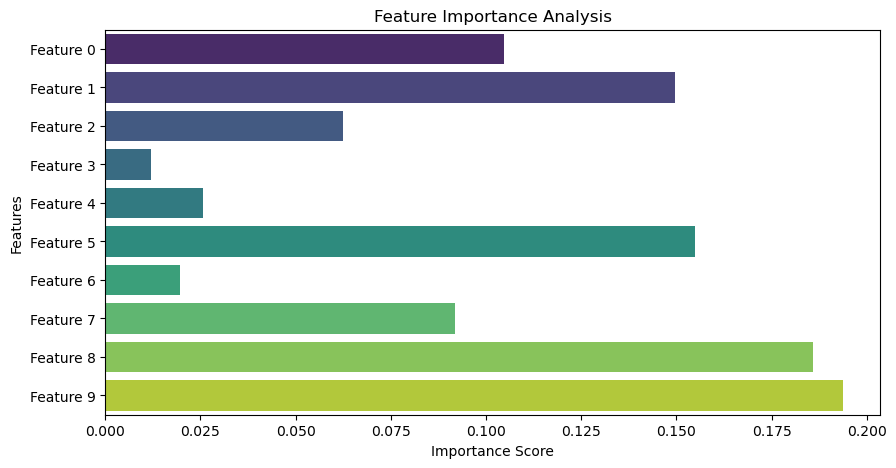

In [7]:
### Step 7: Optional Enhancements

# Step 7.1: Hyperparameter Tuning with Optuna
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    
    model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    model.fit(X_train_seq.reshape(len(X_train_seq), -1), y_train_seq)
    y_pred = model.predict(X_test_seq.reshape(len(X_test_seq), -1))
    return mean_squared_error(y_test_seq, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
print("Best Parameters Found:", study.best_params)

# Step 7.2: Feature Importance Analysis
import seaborn as sns

feature_importance = model_gbr.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=[f"Feature {i}" for i in range(len(feature_importance))], palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.show()
